In [0]:
from skimage import io
import re
import matplotlib.pyplot as plt
import warnings
import os
import numpy as np
warnings.filterwarnings('ignore')

In [0]:
!unzip '/content/Img_Patches_128_new.zip'

In [0]:
# Imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [0]:
data_dir='/content/content/Img_Patches'
train_dir = data_dir + '/Streak'
valid_dir = data_dir + '/Serial'
test_dir = data_dir + '/Control'

In [10]:
img=io.imread('/content/content/Img_Patches/Control/P1C1/7-10_PM_P1C1_Control.jpg_11_10.jpg')
print(img.shape)

(128, 128, 3)


In [0]:
# Define transforms for the training, validation, and testing sets
training_transforms = transforms.Compose([transforms.RandomRotation(30),
                                          #transforms.RandomResizedCrop(224),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.5, 0.5, 0.5], 
                                                               [0.5, 0.5, 0.5])])

validation_transforms = transforms.Compose([#transforms.Resize(256),
                                            #transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.5, 0.5, 0.5], 
                                                                 [0.5, 0.5, 0.5])])

testing_transforms = transforms.Compose([#transforms.Resize(256),
                                         #transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.5, 0.5, 0.5], 
                                                              [0.5, 0.5, 0.5])])

# TODO: Load the datasets with ImageFolder
training_dataset = datasets.ImageFolder(train_dir, transform=training_transforms)
validation_dataset = datasets.ImageFolder(valid_dir, transform=validation_transforms)
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
validate_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)

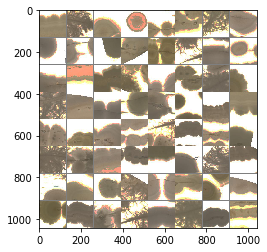

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*120*120, 120)
        self.fc3 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print(x.shape)
        x = F.relu(self.conv2(x))
        #print(x.shape)
        x = x.view(x.shape[0],-1)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        return x
net = Net()

In [0]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    
    val_loss = 0
    accuracy = 0
    
    for images, labels in iter(validateloader):

        images, labels = images.to('cuda'), labels.to('cuda')

        output = model.forward(images)
        val_loss += criterion(output, labels).item()

        probabilities = torch.exp(output)
        
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times
    print("epoch {} \n".format(epoch))
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 20 mini-batches
            print('[%d, %5d] training loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            correct = 0
            total = 0
            with torch.no_grad():
                for data in validate_loader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data,1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the validation images: %d %%' % (100 * correct / total))
            
            running_loss = 0.0
print('Finished Training')

epoch 0 

[1,    50] training loss: 2.113
Accuracy of the network on the validation images: 25 %
[1,   100] training loss: 1.897
Accuracy of the network on the validation images: 24 %
epoch 1 

[2,    50] training loss: 1.720
Accuracy of the network on the validation images: 27 %
[2,   100] training loss: 1.621
Accuracy of the network on the validation images: 25 %
epoch 2 

[3,    50] training loss: 1.507
Accuracy of the network on the validation images: 29 %
[3,   100] training loss: 1.473
Accuracy of the network on the validation images: 35 %
epoch 3 

[4,    50] training loss: 1.385
Accuracy of the network on the validation images: 31 %
[4,   100] training loss: 1.348
Accuracy of the network on the validation images: 31 %
epoch 4 

[5,    50] training loss: 1.295
Accuracy of the network on the validation images: 38 %
[5,   100] training loss: 1.266


# stop running cells below 

In [0]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    
    val_loss = 0
    accuracy = 0
    
    for images, labels in iter(validateloader):

        images, labels = images.to('cuda'), labels.to('cuda')

        output = model.forward(images)
        val_loss += criterion(output, labels).item()

        probabilities = torch.exp(output)
        
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [0]:
# Loss function and gradient descent
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [76]:
# Train the classifier

# from workspace_utils import active_session

def train_classifier():

    # with active_session():

        epochs = 15
        steps = 0
        print_every = 40

        model.to('cuda')

        for e in range(epochs):
        
            model.train()
    
            running_loss = 0
    
            for images, labels in iter(train_loader):
        
                steps += 1
        
                images, labels = images.to('cuda'), labels.to('cuda')
                optimizer.zero_grad()
                output = model.forward(images)
                loss = criterion(output,labels)
                loss.backward()
                optimizer.step()
                print(images.shape)
                running_loss += loss.item()
        
                if steps % print_every == 0:
                
                    model.eval()
                
                    # Turn off gradients for validation, saves memory and computations
                    with torch.no_grad():
                        validation_loss, accuracy = validation(model, validate_loader, criterion)
            
                    print("Epoch: {}/{}.. ".format(e+1, epochs),
                          "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                          "Validation Loss: {:.3f}.. ".format(validation_loss/len(validate_loader)),
                          "Validation Accuracy: {:.3f}".format(accuracy/len(validate_loader)))
            
                    running_loss = 0
                    model.train()
                    
train_classifier()

RuntimeError: ignored

In [77]:
for images, labels in iter(train_loader):
  print(images.shape)
  print(labels.shape)

torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([64, 3, 128, 128])
torch.Size([64])
torch.Size([6

KeyboardInterrupt: ignored

In [0]:
# file statistics needs to be changed later 
# patch_file_list=os.listdir("/content/Img_Patches/")
# print("total number of positive patches are {}".format(len(os.listdir("/content/Img_Patches/"))))
# combined=''.join(patch_file_list)
# pattern=[]
# for i in range(1,11):
#   for j in ["Serial","Control","Streak"]:
#       pattern.append('P1C'+str(i)+'_'+j)
# for p in pattern:
#   print("{} : {}".format(p,combined.count(p)))

In [0]:
#dataset statistics 
print("training dataset is {}\n".format(len(train_path)))
print("validation dataset is {}\n".format(len(val_path)))
print("test dataset is {}\n".format(len(test_path)))

training dataset is 8108

validation dataset is 4764

test dataset is 867



In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
# read in the image 
train_x=[io.imread('/content/Img_Patches/'+path) for path in train_path]
test_x=[io.imread('/content/Img_Patches/'+path) for path in test_path]
val_x=[io.imread('/content/Img_Patches/'+path) for path in val_path]
# train_x=torch.FloatTensor(train_x)
# test_x=torch.FloatTensor(test_x)
# val_x=torch.FloatTensor(val_x)

KeyboardInterrupt: ignored

In [0]:
# label the dataset 
train_y=[path.split('_')[5] for path in train_path]
val_y=[path.split('_')[5] for path in val_path]
test_y=[path.split('_')[5] for path in test_path]